In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\dimit\OneDrive\Bureau\Pace classes\CS 675 - Introduction to Data Science\Project #1\telco-customer-churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Here we noticed that the TotalCharges column is an object column and not a numerical one, we are going to need to convert it to a numerical one before starting the EDA - a float column specifically, since the number are not integers

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 1- Prep the data in order to be ready to be fed to a model. 

### Look for missing, null, NaN records. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dataset contains null values, specifically 10 null values for the TotalCharges field

In [6]:
df['TotalCharges'] = df['TotalCharges'].fillna(0).astype('float64')

Filling NA values in TotalCharges column with int 0 to be able to turn it into a numerical column, which is the type of column it's supposed to be. I took the value as 0 because I assume here that customers have not been charged yet.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data set is ready to go! No null values anymore and totalcharges is now a numerical field, as it should

### Find outliers

<AxesSubplot:xlabel='MonthlyCharges'>

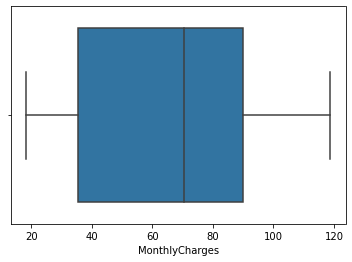

In [8]:
sns.boxplot(x=df['MonthlyCharges'])

<AxesSubplot:xlabel='tenure'>

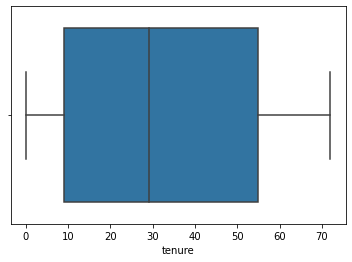

In [9]:
sns.boxplot(x=df['tenure'])

<AxesSubplot:xlabel='SeniorCitizen'>

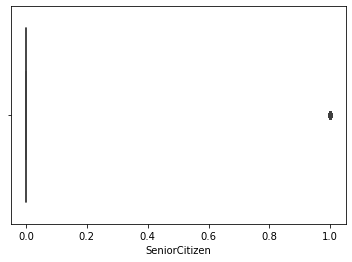

In [10]:
sns.boxplot(x=df['SeniorCitizen'])

While SeniorCitizen is technically as numerical field from a Pandas perspective, it's actually a discrete one so it does not make sense to consider 1 values as outliers here

<AxesSubplot:xlabel='TotalCharges'>

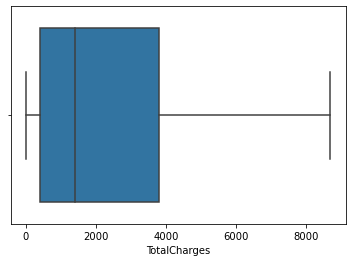

In [11]:
sns.boxplot(x=df['TotalCharges'])

According to the blox plot for TotalCharges, there are no outliers. However, it looks like there are some pretty high values (8000) compared to the upper quartile which is around 4000

### Transform data – all entries should be numeric.

In [12]:
df_copy = df.copy() #using a copy of the dataset to conserve the properties of the initial dataset

from sklearn.preprocessing import LabelEncoder
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = df_copy.columns.values.tolist()
for col in features:
    if df_copy[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in df_copy.columns:
        le = LabelEncoder()
        le.fit(list(df_copy[col].astype(str).values))
        df_copy[col] = le.transform(list(df_copy[col].astype(str).values))
df_copy

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


In [13]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
customerID,7043.0,3521.000000,2033.283305,0.00,1760.50,3521.00,5281.50,7042.00
gender,7043.0,0.504756,0.500013,0.00,0.00,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
MultipleLines,7043.0,0.940508,0.948554,0.00,0.00,1.00,2.00,2.00
InternetService,7043.0,0.872923,0.737796,0.00,0.00,1.00,1.00,2.00
OnlineSecurity,7043.0,0.790004,0.859848,0.00,0.00,1.00,2.00,2.00


# 2- List all types of data, numeric, categorical, text

In [14]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
for column in df.drop(columns=['customerID','Churn']):
    if df[column].dtype == object:
        print('The feature {0} is a discrete field and has unique values {1}'.format(column,set(df[column])))

The feature gender is a discrete field and has unique values {'Female', 'Male'}
The feature Partner is a discrete field and has unique values {'Yes', 'No'}
The feature Dependents is a discrete field and has unique values {'Yes', 'No'}
The feature PhoneService is a discrete field and has unique values {'Yes', 'No'}
The feature MultipleLines is a discrete field and has unique values {'No', 'Yes', 'No phone service'}
The feature InternetService is a discrete field and has unique values {'Fiber optic', 'DSL', 'No'}
The feature OnlineSecurity is a discrete field and has unique values {'No internet service', 'Yes', 'No'}
The feature OnlineBackup is a discrete field and has unique values {'No internet service', 'Yes', 'No'}
The feature DeviceProtection is a discrete field and has unique values {'No internet service', 'Yes', 'No'}
The feature TechSupport is a discrete field and has unique values {'No internet service', 'Yes', 'No'}
The feature StreamingTV is a discrete field and has unique val

# 3- Perform EDA on data.

This chart represents repartition of field gender


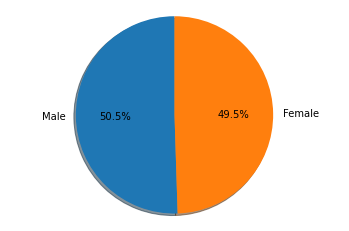

This chart represents repartition of field Partner


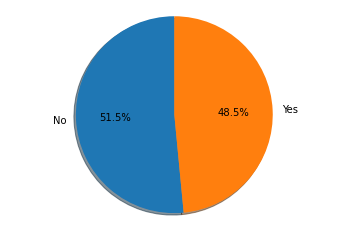

This chart represents repartition of field Dependents


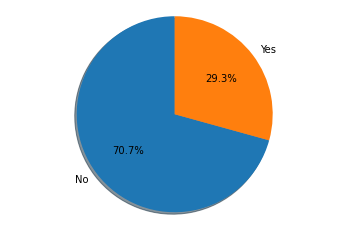

This chart represents repartition of field PhoneService


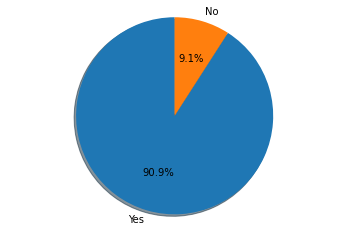

This chart represents repartition of field MultipleLines


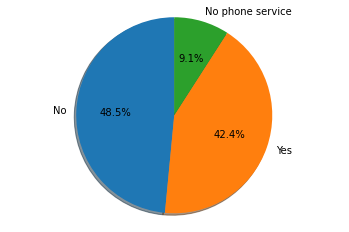

This chart represents repartition of field InternetService


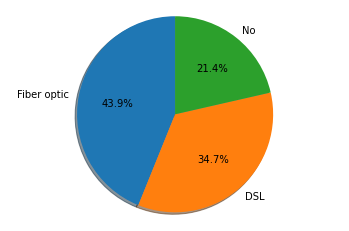

This chart represents repartition of field OnlineSecurity


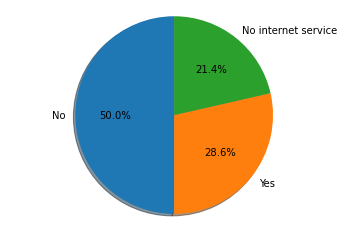

This chart represents repartition of field OnlineBackup


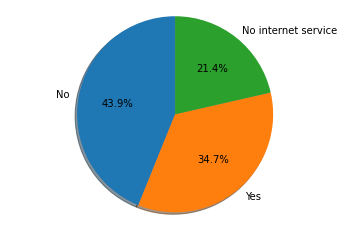

This chart represents repartition of field DeviceProtection


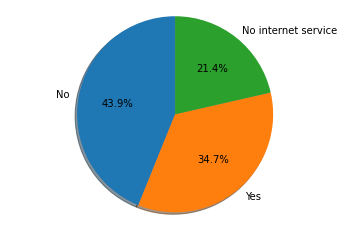

This chart represents repartition of field TechSupport


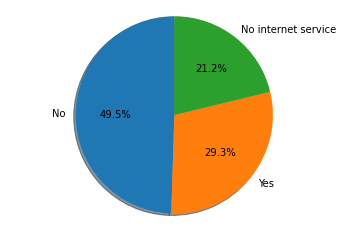

This chart represents repartition of field StreamingTV


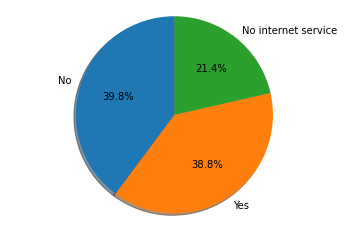

This chart represents repartition of field StreamingMovies


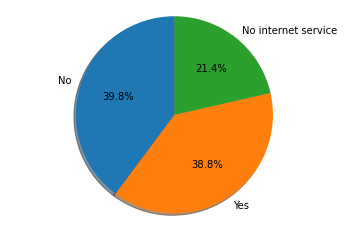

This chart represents repartition of field Contract


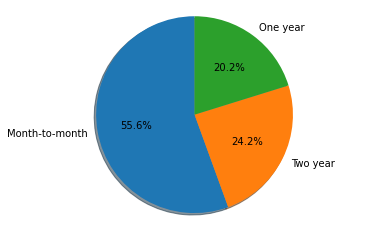

This chart represents repartition of field PaperlessBilling


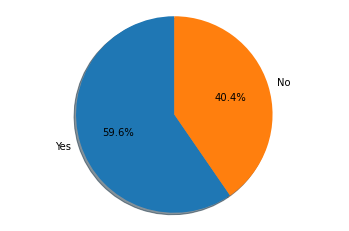

This chart represents repartition of field PaymentMethod


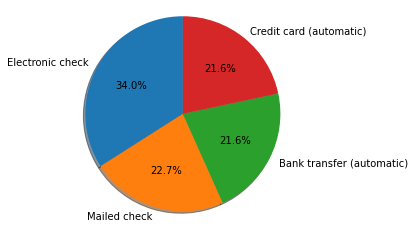

This chart represents repartition of field Churn


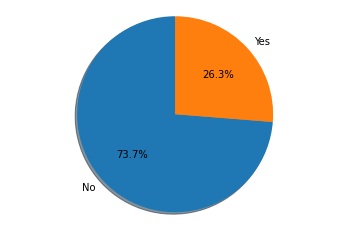

In [16]:
for i,column in enumerate (df.drop(columns = ['customerID'])):
    if df[column].dtype == object:
        print('This chart represents repartition of field {0}'.format(column))
        fig1, ax1 = plt.subplots()
        ax1.pie(list((100*df[column].value_counts()/len(df[column])).astype(int)), labels=list(df[column].value_counts().index), autopct='%1.1f%%',
                shadow=True, startangle=90)
        ax1.axis('equal')
        plt.show()

From all the above pie charts, we can see that quite a few features are in the situation of class imbalance (such as the field 'Dependents'). We do not have to build a model today so we will not use techniques such as over/under sampling, but by generating these pie charts we were able to realise the potential issue of class imbalance that may have caused issue for traning a model down the road.

<AxesSubplot:>

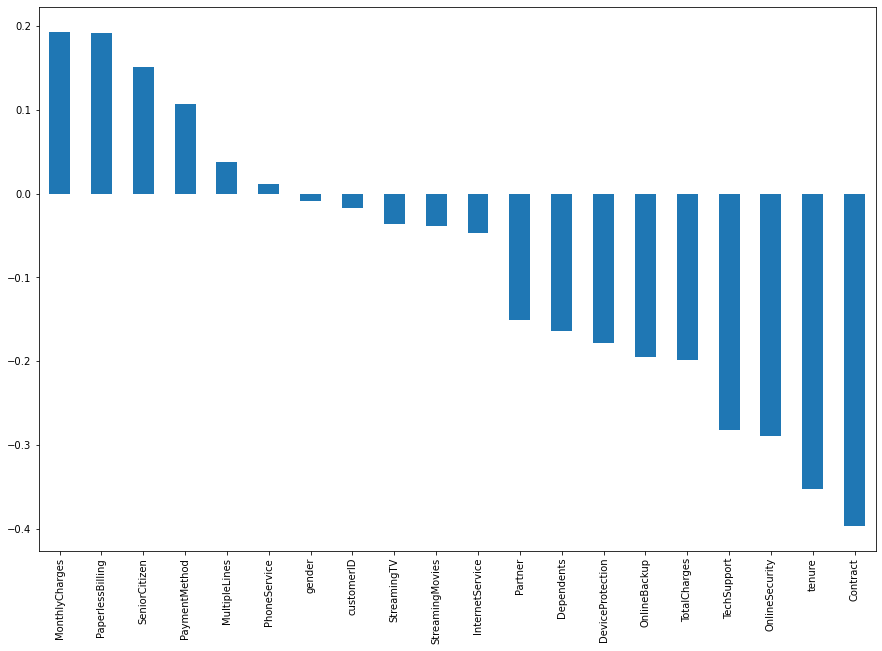

In [17]:
plt.figure(figsize = (15, 10))
df_copy.corr()["Churn"].sort_values(ascending = False)[1:].plot(kind = "bar")

By looking at this bar chart summarising the correlations related to 'Churn' feature, we can see that MonthlyCharges and Paperbilling features have the largest positive correlations, while Contract and tenure have the largest negative correlations 

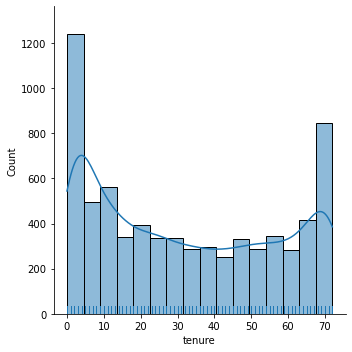

In [18]:
#df['tenure']#.value_counts()
sns.displot(df['tenure'],kde=True, rug=True)
plt.show()

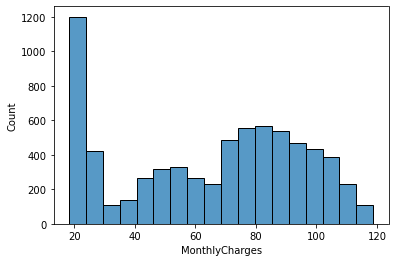

In [19]:
sns.histplot(df['MonthlyCharges'])#, kde=False, rug=True)
plt.show()

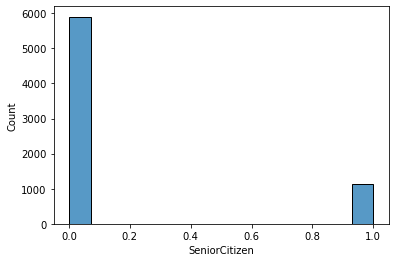

In [20]:
sns.histplot(df['SeniorCitizen'])#, kde=False, rug=True)
plt.show()

C:\Users\dimit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SeniorCitizen', ylabel='tenure'>

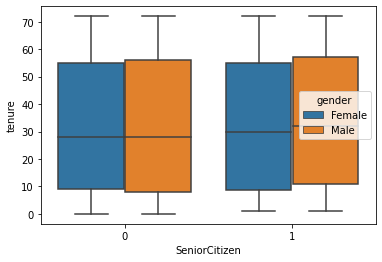

In [21]:
#Relationship between gender & demographics in regards to tenure
#sns.stripplot(df['gender'], df['tenure'])
sns.boxplot( df['SeniorCitizen'], df['tenure'], hue=df['gender'])

We observe that senior male citizens tend to have a longer tenure (according to median and upper/lower IQR) than any other demographics

C:\Users\dimit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SeniorCitizen', ylabel='MonthlyCharges'>

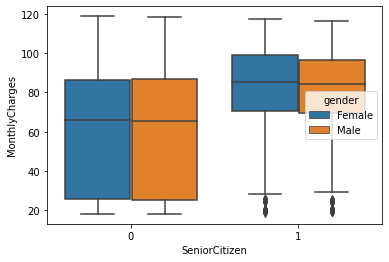

In [22]:
sns.boxplot( df['SeniorCitizen'], df['MonthlyCharges'], hue=df['gender'])

We observe that older citizens tend to have higher monthly payments than their younger counterparts, with female senior citizens having the highest monthly payments than any other demographics

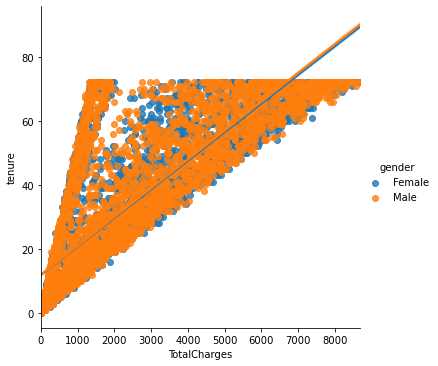

In [23]:
sns.lmplot(x='TotalCharges', y ='tenure', data= df , hue='gender')

Unsurprisingly, there is a clear-cut correlation between tenure and total charges. It makes sense because the longer a person stays subscribed, the more this person will have been charged in total by the company

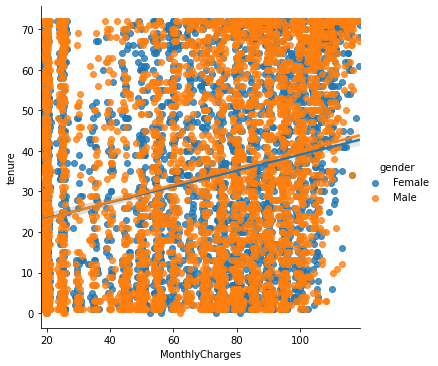

In [24]:
sns.lmplot(x='MonthlyCharges', y ='tenure', data= df , hue='gender')

Here we observe that there is a positive correlation between monthly charge and tenure. People who have the highest monthly payments tend to be those who have been subscribers the longest. One possible analysis of this relationship is that the higher-end plans provide customers the most satisfaction comapred to the competitors, while the lower-end plans tend to be less competitve compared to the rest of the market. This could be a point of attention for the company

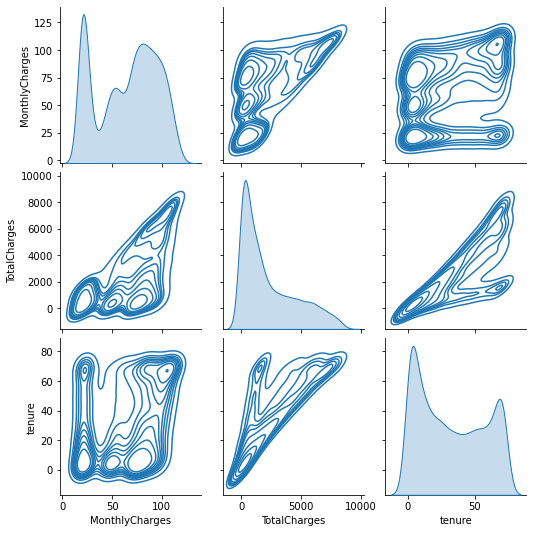

In [25]:
sns.pairplot(df[['MonthlyCharges', 'TotalCharges', 'tenure']], kind='kde')

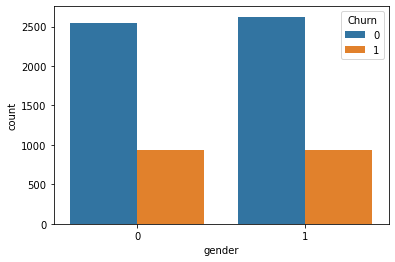

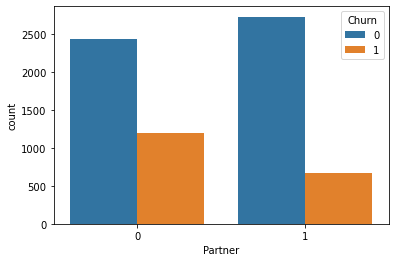

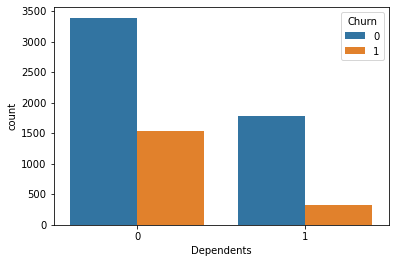

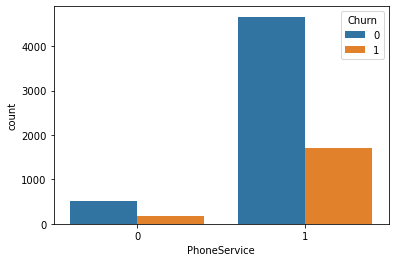

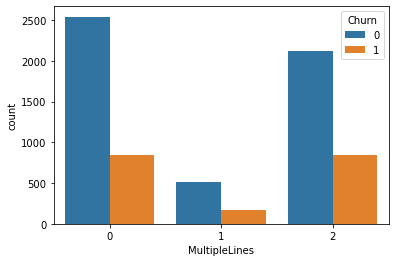

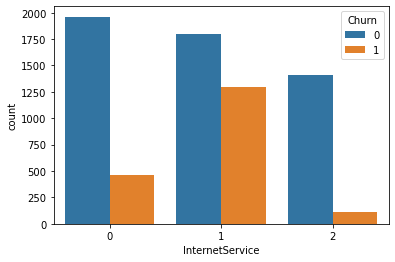

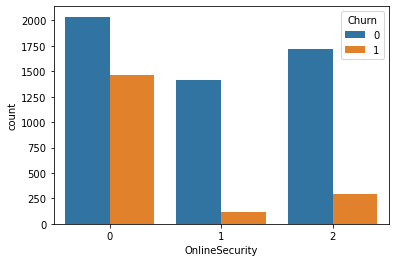

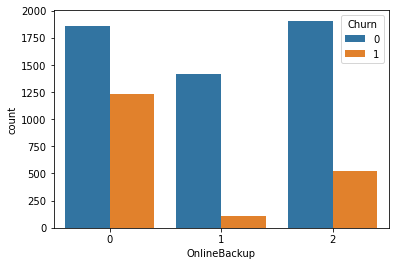

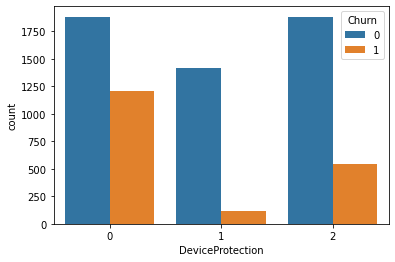

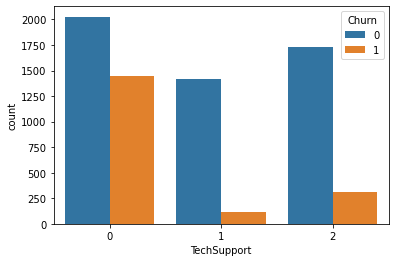

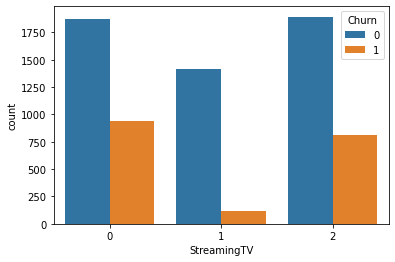

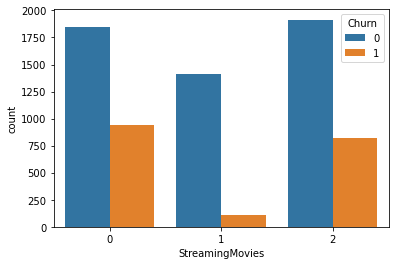

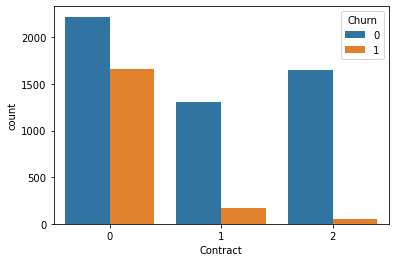

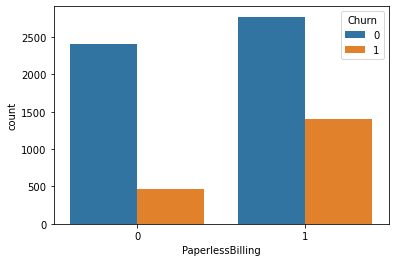

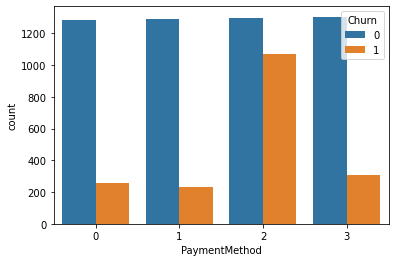

In [26]:
for i,column in enumerate (df.drop(columns = ['customerID','Churn'])):
    if df[column].dtype == object:
        plt.figure(i)
        sns.countplot(x = df_copy[column], hue = df_copy["Churn"])

Looking at the above list of countplots, we see that fields such as PaperlessBilling, contract and PaymentMethod have a high varation when it comes to Churn depending on the value of each of these fields. This could give a hint to management to dive deeper into the underlying potential cause of such variation in churn rates.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

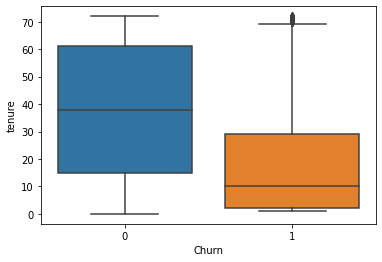

In [27]:
sns.boxplot(y = df_copy['tenure'],x=df_copy['Churn'])

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

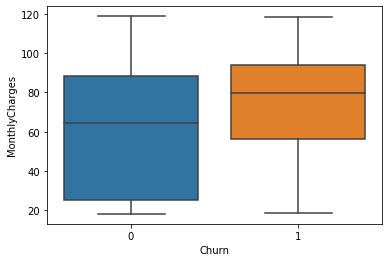

In [28]:
sns.boxplot(y = df_copy['MonthlyCharges'],x=df_copy['Churn'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 



### Present dependencies and correlations among the various features in the data.

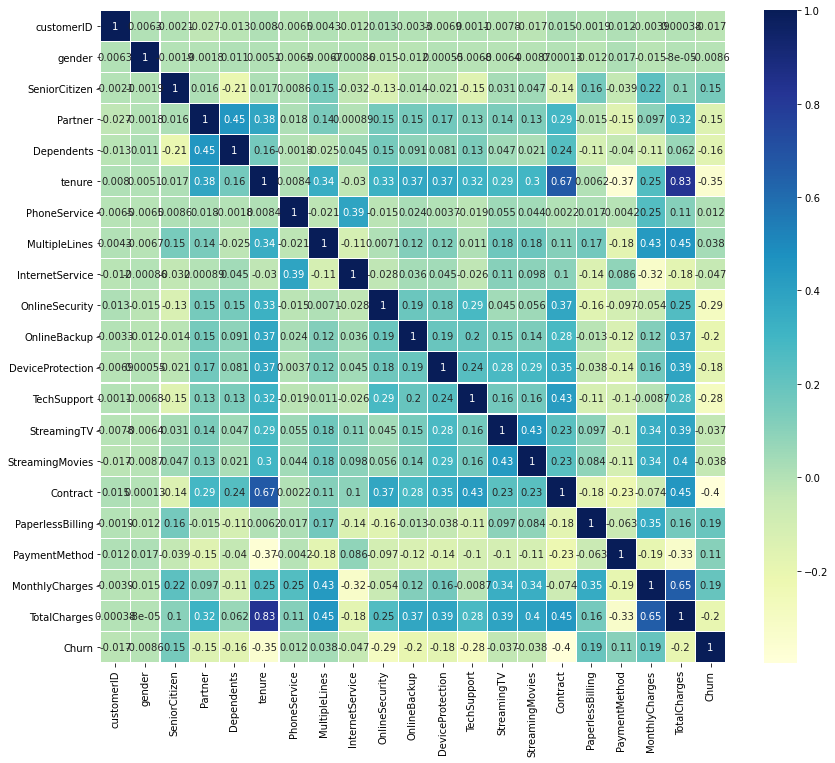

In [30]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))

sns.heatmap(df_copy.corr(),linewidths=.1,cmap="YlGnBu", annot=True)

plt.yticks(rotation=0);

### List the most important variables (Feature Importance) that will affect the target label.

Looking at the negative correlations, it appears that the Contract field has the most impact on Churn.

Looking at positive correlations, we have MonthlyCharges.

This seems to coincide with our analysis stated above, in which we mentionned that higher-end plans seem to provide the most satisfaction to customer as customer with higher-end plans also have the longest tenure, which therefore decrease customer churn

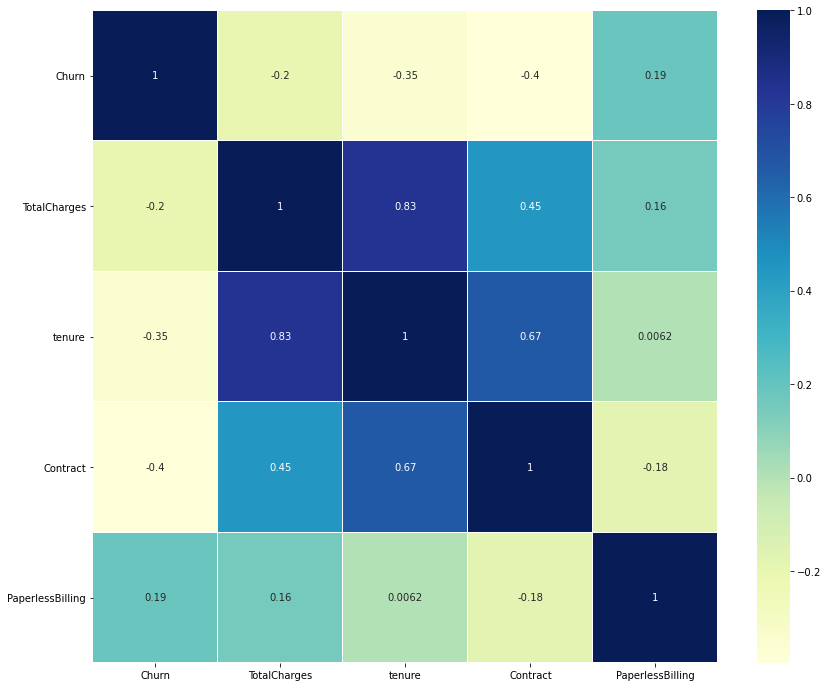

In [31]:
#df_copy[['Churn','TotalCharges','tenure','Contract','PaperlessBilling']]

plt.figure(figsize=(14,12))

sns.heatmap(df_copy[['Churn','TotalCharges','tenure','Contract','PaperlessBilling']].corr(),linewidths=.1,cmap="YlGnBu", annot=True)

plt.yticks(rotation=0);

Generated a correlation matrix with a subset of features from the dataset (most important features) for more visibility and clarity

# 4- Split the dataset into training and test datasets (80/20 ratio).

In [32]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df_copy, test_size = 0.20, random_state = 0)
print(train.shape)
print(test.shape)

(5634, 21)
(1409, 21)


C:\Users\dimit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

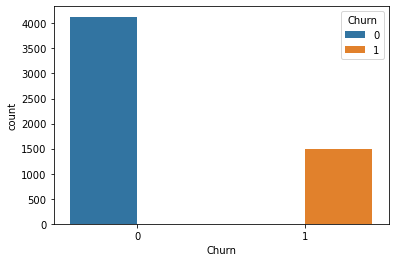

In [33]:
#sns.barplot(train['Churn'], test['Churn'])
sns.countplot(train['Churn'], hue=train['Churn'])

C:\Users\dimit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

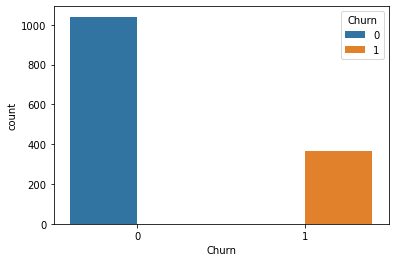

In [34]:
sns.countplot(test['Churn'], hue=test['Churn'])

### Using SweetViz’s ‘compare’ command contrast the training vs test datasets on the target (‘churn’)

In [35]:
import sweetviz as sv
sv.compare(train,test).show_html('Compare.html')


Report Compare.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


According to Sweetviz's compare() function's html report, the most important feature by
categorical association is Contract, followed by OnlineSupport and TechSupport

This suggests that support in general, whether online or by a technician, is the main factor in providing customer satisfaction and obtaining customer retention for the company

It looks like the training and test datasets, as far as churn is concerned, are pretty similar. This means that the test set should do a great job a providing an estimate of how well the learning of a model on the train set will generalise

# 5- State limitations/issues (if any) with the given dataset

-The age is not very well segmented, as seen at the beginning of the EDA there is a SeniorCitizen is a very imbalanced column, with the vasr majority of people been classified as 'not senior'. It would help having a more detailed segmentation of the customers' age.

-The TotalCharge column was also containing blank values which should have been 0 (assuming blank means the customer has not been charged once yet). 

-Having At least one geographical feature, such as the location of the customer, would probably be beneficial as we would be able to identify the variation of the customer churn rate accross the country. This dataset is lacking such type of class.

-To further segment the customer base, having a class representing ethnicity would also be beneficial as we would be able to identify what ethnic group have the highest churn rate. This would spark further research and analysis in order to help effort of maximising customers' satisfaction